# Evaluation of a new Pointing technique

## Experiment Design

In a short experiment users needed time for 40 pointing task was recorded. 
The Experiment shows 100 circles on the screen, 99 are blue and 1 is yellow.
The participants had to click on the yellow marked Circle on the screen. 
Every participant was shown 40 stimuli of the scene varying on distance and pointing technique.
Pointing technique can be the self-implemented Angle pointing or the normal(default) poinitng.
Distance, distance form pointer to target can be close(40-140px) or far(400-500px).
The completion time, time the user needs to click on the marked circle was measured.


### Pointing Technique

## Hypotheses

    1. The Angle Mouse pointing performs faster than the normal/default pointing.
    2. The Angle Mouse pointing performs faster on closer distances than the normal pointing.
    3. The Angle Mouse pointing performs faster on further distances than the normal pointing.
   
## Variables

Dependent variables:
* Completion time since the ui is drawn until the user clicks on the marked item
Independent variables:
* Distance; near or far
* Pointing function; self implemented angle-mouse technique or normal mouse function
Control variables:
* Mouse, Logitech G300 mouse
* Cursor icon, defualt icon form macOS  
* Display, fullscreen display of the MacbookPro 13“- Modell 2016
* Place of experiment, experimenter apartment
* Time of day, Wednesday, 16 o’clock
* Age of participants, between 20 and 30
Random variables:
* Understanding of the task by the attendee
* Pointing function the attendee is used to
* Focus of the attendee
Confounding variables:
* Distractions

## Participants

The study was conducted with 4 students, all participants were male and in their early 20s.
The experiments location was done at the experimeters private home. 
The academic backgrounds of the participants are expected to have no effect on the results.

## Pointing Technique
The angle mouse pointing technique will speedup your mouse movement if you move within an certain angle (close to
linear) compared to your last position. You can find a detailed description in the file pointing_technique.py



## Reading the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams  


In [2]:
# read the data
full_data = pd.read_csv("experiment_alldata.csv", delimiter = ";")

# A stands for Angel Mouse, P for normal poinitng
# F for far diastance, N for near distance
# get data for every stimulus
data_AN = full_data[(full_data["new_pointing_technique"] == True) 
                      & (full_data["distance"] == 'NEAR' )]["task_completion_time"]
data_AF = full_data[(full_data["new_pointing_technique"] == True) 
                      & (full_data["distance"] == 'FAR' )]["task_completion_time"]
data_PN = full_data[(full_data["new_pointing_technique"] == False) 
                      & (full_data["distance"] == 'NEAR' )]["task_completion_time"]
data_PF = full_data[(full_data["new_pointing_technique"] == False) 
                      & (full_data["distance"] == 'FAR' )]["task_completion_time"]

data_A = full_data[(full_data["new_pointing_technique"] == True)]["task_completion_time"]
data_P = full_data[(full_data["new_pointing_technique"] == False)]["task_completion_time"]





# Hypothese 1: completion time in general between angle and normal poinitng


## Visualisation

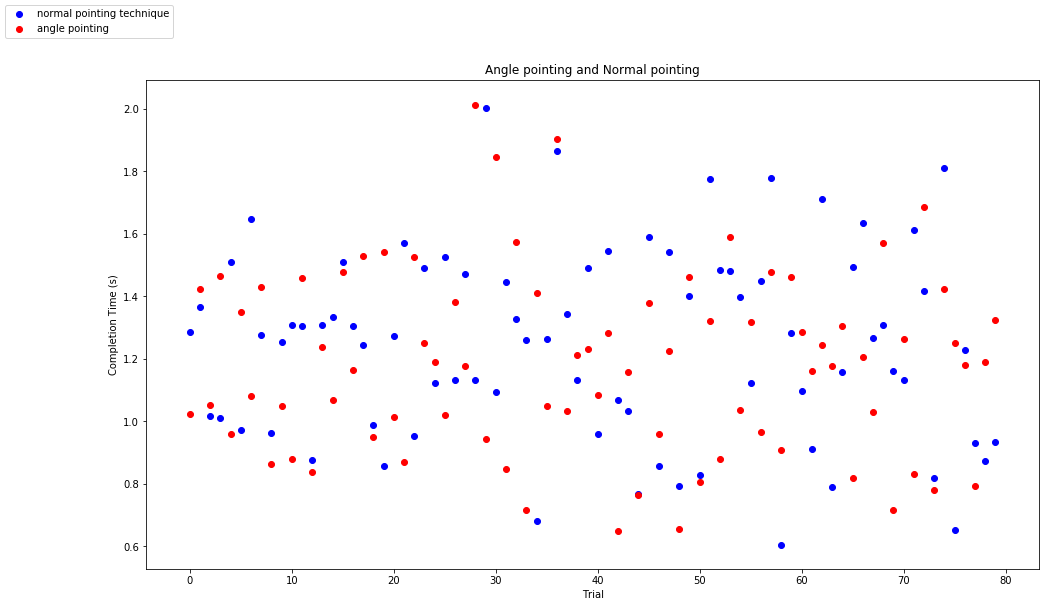

In [4]:
# plot configurations
%matplotlib inline
rcParams['figure.figsize'] = (16,9)

# get y axis length
ordinate = range(len(data_P))

graph = plt.figure()
plot_whole = graph.add_subplot(111)

# add data for each participant
plot_whole.scatter(ordinate, list(data_A), c="b",
                   label="normal pointing technique")
plot_whole.scatter(ordinate, list(data_P), c="r",
                   label="angle pointing")
plot_whole.title.set_text("Angle pointing and normal pointing")
plot_whole.set_xlabel("Trial")
plot_whole.set_ylabel("Completion Time (s)")

# show legend
graph.legend(loc="upper left")


Text(0.5, 0, 'Trial')

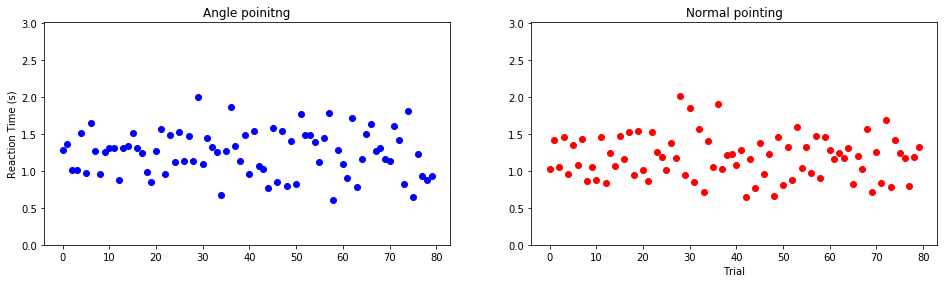

In [5]:
graph2 = plt.figure()

# norm all the y-axes
ymax = full_data["task_completion_time"].max() + 1

# draw graphs
plot_11 = graph2.add_subplot(221)
plot_11.scatter(ordinate, list(data_A), c="b") 
plot_11.title.set_text("Angle poinitng")
plot_11.set_ylim([0, ymax])
plot_11.set_ylabel("Reaction Time (s)")

plot_21 = graph2.add_subplot(222)
plot_21.scatter(ordinate, list(data_P), c="r")
plot_21.title.set_text("Normal pointing")
plot_21.set_ylim([0, ymax])
plot_21.set_xlabel("Trial")

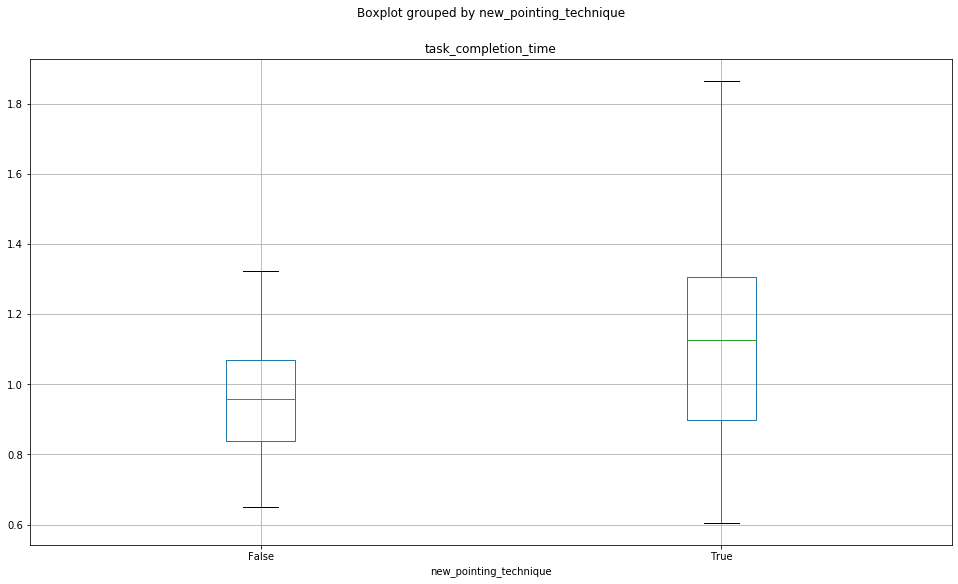

In [16]:
full_data.boxplot(column="task_completion_time", by="new_pointing_technique",
                  labels=["Angle Poinitng", "Normal Poinitng"])

## T-Tests
Since the data is gathered from different participants within a stimulus and the stimuli are recorded within the same group, the t-test for related samples is used.

In [6]:
from scipy.stats import ttest_rel

t_statistic_1, p_value_1 = ttest_rel(data_A, data_P)
print("p-value: %2.30f" %(p_value_1))


p-value: 0.151541840137535938071167151975


## Result

Using a significance level of 95%, no significant differences between the angle pointing
and normal pointing processed stimuli can be found. 
In contrast to the expectations, all 2 distributions are very similar to each other. The statistical analysis provided here shows visually and computationally no significant differences between the compared groups.
So the Hypothese 1(The Angle Mouse pointing performs faster than the normal/default pointing) can be denied.


# Hypothese 2 completion time on near distance

## Visualisation

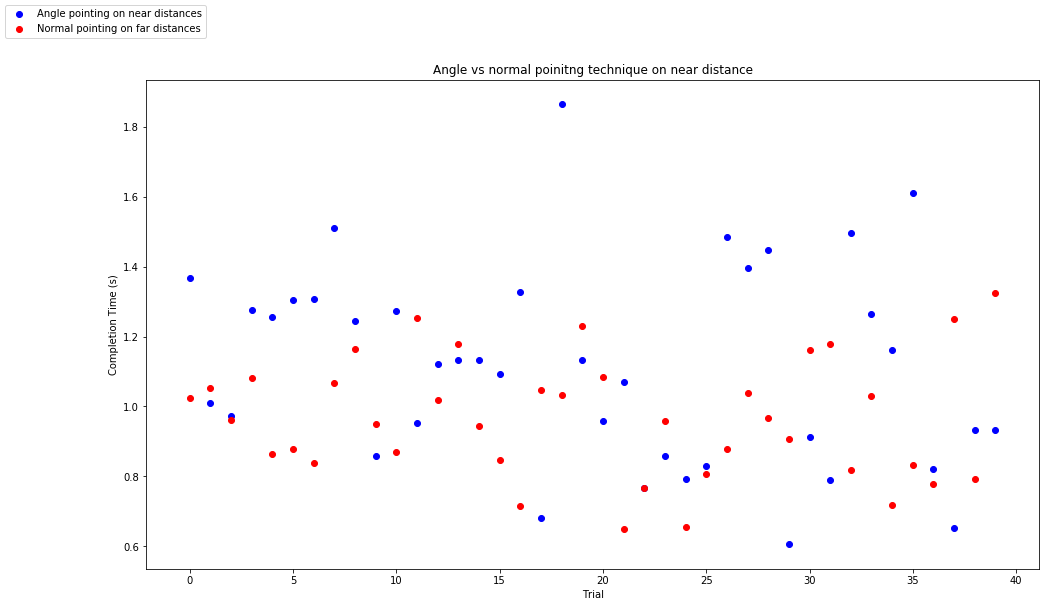

In [8]:
# plot configurations
%matplotlib inline
rcParams['figure.figsize'] = (16,9)

# get y axis length
ordinate = range(len(data_AN))

graph = plt.figure()
plot_whole = graph.add_subplot(111)

# add data for each participant
plot_whole.scatter(ordinate, list(data_AN), c="b",
                   label="Angle pointing on near distances")
plot_whole.scatter(ordinate, list(data_PN), c="r",
                   label="Normal pointing on far distances")
plot_whole.title.set_text("Angle vs normal poinitng technique on near distance")
plot_whole.set_xlabel("Trial")
plot_whole.set_ylabel("Completion Time (s)")

# show legend
graph.legend(loc="upper left")

Text(0.5, 0, 'Trial')

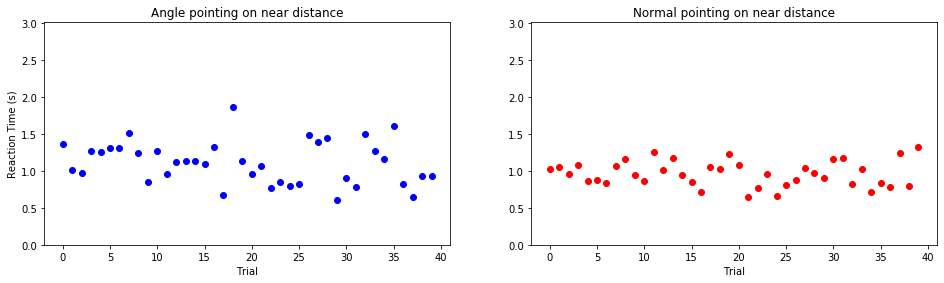

In [20]:
graph2 = plt.figure()

# norm all the y-axes
ymax = full_data["task_completion_time"].max() + 1

# draw graphs
plot_11 = graph2.add_subplot(221)
plot_11.scatter(ordinate, list(data_AN), c="b") 
plot_11.title.set_text("Angle pointing on near distance")
plot_11.set_ylim([0, ymax])
plot_11.set_ylabel("Reaction Time (s)")
plot_11.set_xlabel("Trial")

plot_21 = graph2.add_subplot(222)
plot_21.scatter(ordinate, list(data_PN), c="r")
plot_21.title.set_text("Normal pointing on near distance")
plot_21.set_ylim([0, ymax])
plot_21.set_xlabel("Trial")


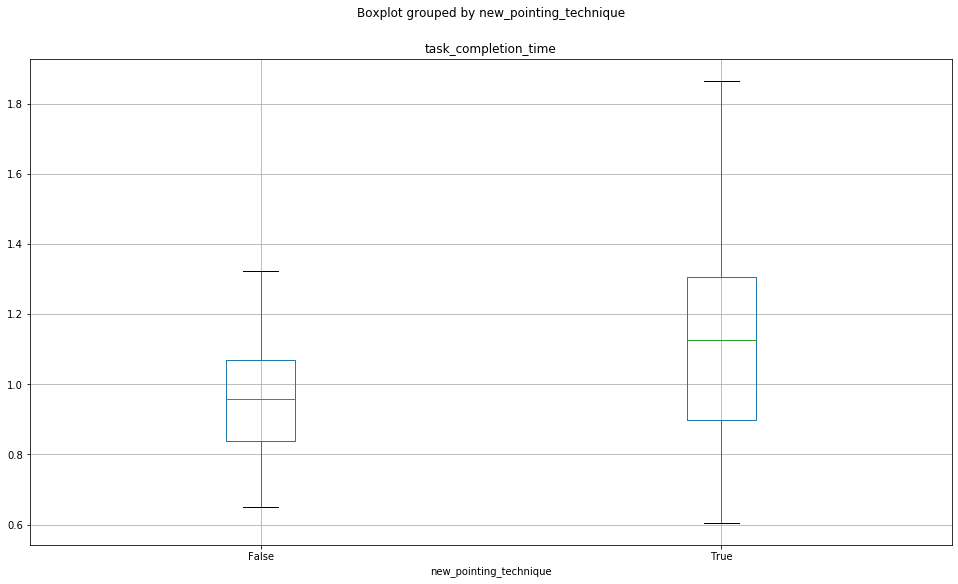

In [17]:
data_NB = full_data[(full_data["distance"] == 'NEAR' )]

data_NB.boxplot(column="task_completion_time", by="new_pointing_technique",
                  labels=["Angle Poinitng",
                          "Normal Poinitng"])

## T-Tests
Since the data is gathered from different participants within a stimulus and the stimuli are recorded within the same group, the t-test for related samples is used.

In [69]:
#Angle Pointing vs normal pointing error rate 
t_statistic_1, p_value_1 = ttest_rel(data_AN, data_PN)
print("p-value: %2.30f" %(p_value_1))

p-value: 0.267857087931126613966625882313


## Result

Using a significance level of 95%, no significant differences between the angle pointing on near distance
and normal pointing on near distance processed stimuli can be found. 
The 2 distributions are very similar to each other. The statistical analysis provided here shows visually and computationally no significant differences between the compared groups.
So the Hypothese 2(The Angle Mouse pointing performs faster on closer distances than the normal pointing) can be denied.

# Hypothese 3 completion time on further distance

## Visualisation

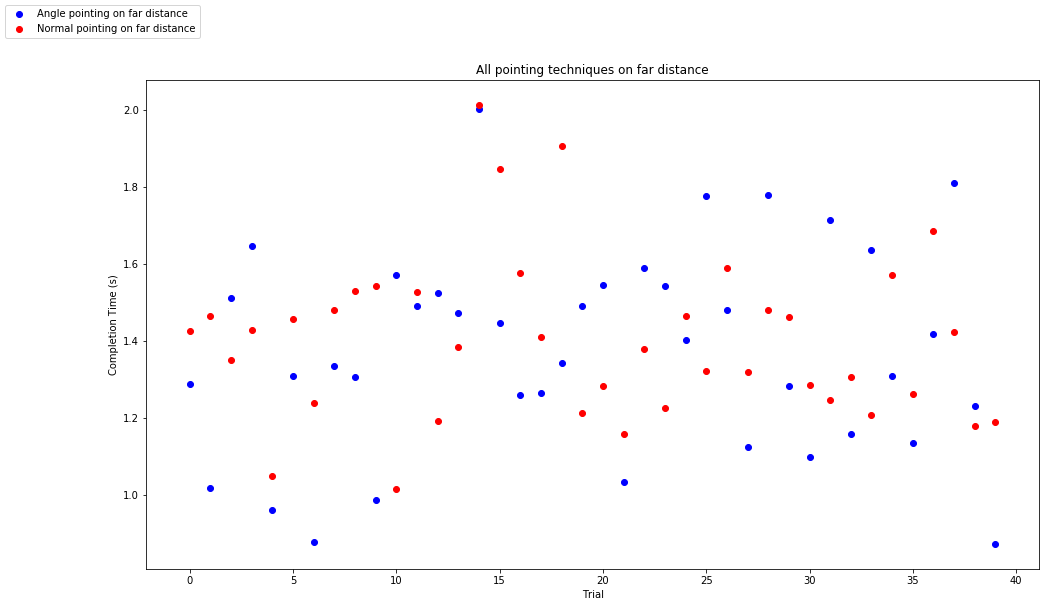

In [21]:
# plot configurations
%matplotlib inline
rcParams['figure.figsize'] = (16,9)

# get y axis length
ordinate = range(len(data_AF))

graph = plt.figure()
plot_whole = graph.add_subplot(111)

# add data for each participant
plot_whole.scatter(ordinate, list(data_AF), c="b",
                   label="Angle pointing on far distance")
plot_whole.scatter(ordinate, list(data_PF), c="r",
                   label="Normal pointing on far distance")
plot_whole.title.set_text("All pointing techniques on far distance")
plot_whole.set_xlabel("Trial")
plot_whole.set_ylabel("Completion Time (s)")

# show legend
graph.legend(loc="upper left")

Text(0.5, 0, 'Trial')

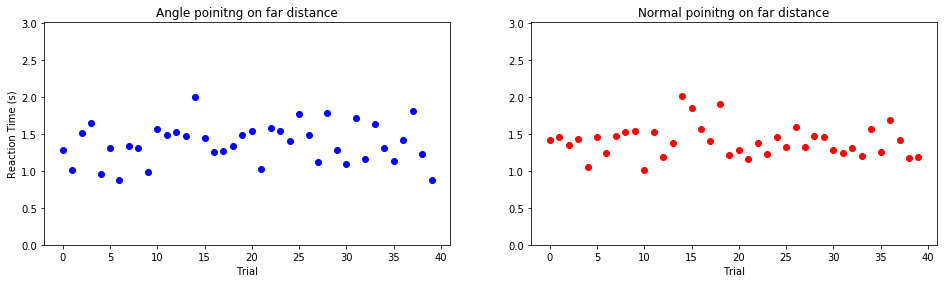

In [22]:
# create new figure with 4 subplots on a 2x2 grid
graph2 = plt.figure()

# norm all the y-axes
ymax = full_data["task_completion_time"].max() + 1

# draw graphs
plot_11 = graph2.add_subplot(221)
plot_11.scatter(ordinate, list(data_AF), c="b") 
plot_11.title.set_text("Angle poinitng on far distance")
plot_11.set_ylim([0, ymax])
plot_11.set_ylabel("Reaction Time (s)")
plot_11.set_xlabel("Trial")

plot_21 = graph2.add_subplot(222)
plot_21.scatter(ordinate, list(data_PF), c="r")
plot_21.title.set_text("Normal poinitng on far distance")
plot_21.set_ylim([0, ymax])
plot_21.set_xlabel("Trial")

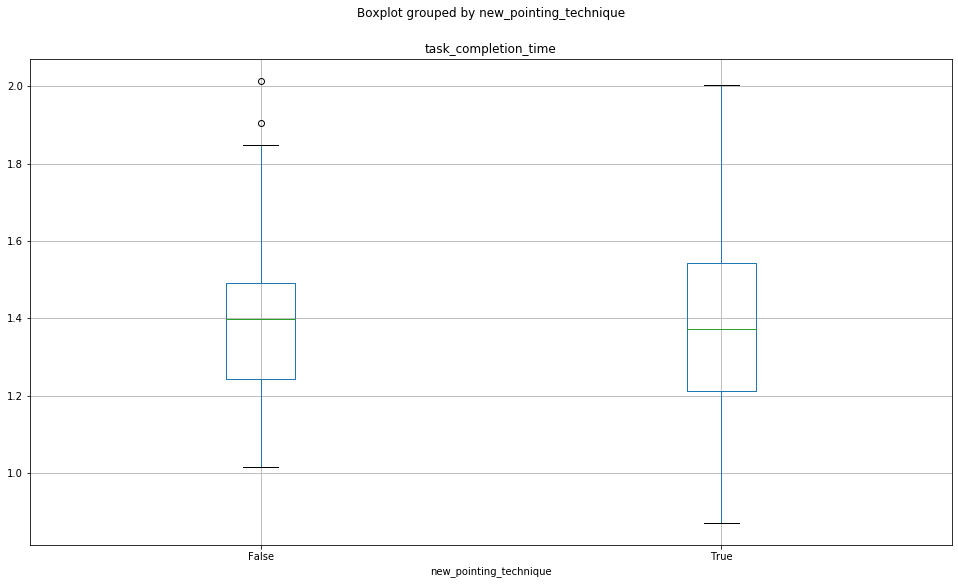

In [23]:
data_FB = full_data[(full_data["distance"] == 'FAR' )]

data_FB.boxplot(column="task_completion_time", by="new_pointing_technique",
                  labels=["Angle Poinitng",
                          "Normal Poinitng"])

## T-Tests
Since the data is gathered from different participants within a stimulus and the stimuli are recorded within the same group, the t-test for related samples is used.

In [25]:
t_statistic_1, p_value_1 = ttest_rel(data_AF, data_PF)
print("p-value: %2.30f" %(p_value_1))

p-value: 0.578789461360731283257052837143


## Result

Using a significance level of 95%, no significant differences between the angle pointing on further distance
and normal pointing on further distance processed stimuli can be found. 
The 2 distributions are very similar to each other. The statistical analysis provided here shows visually and computationally no significant differences between the compared groups.
So the Hypothese 3(The Angle Mouse pointing performs faster on further distances than the normal pointing) can be denied.

# Discussion 

Not any calculated result was significant. So none of the hypothesis is confimed. There might be several reasons for that. First the implementation of the angle pointing can be improved (using better parameters or track the angel change of the last 5 movements). Secondly the angle pointer boosts if the user makes an linear movement, which may not be the natural interaction. Thirdly it might be useful that the user performs several non logged task he could get used to the new poinitng interaction.
Nevertheless the outcome is similar to the paper "The angle mouse: target-agnostic dynamic gain adjustment based on angular deviation"[1]

[1]Wobbrock, J. O., Fogarty, J., Liu, S. Y. S., Kimuro, S., & Harada, S. (2009, April). The angle mouse: 
    target-agnostic dynamic gain adjustment based on angular deviation. In Proceedings of the SIGCHI Conference
    on Human Factors in Computing Systems (pp. 1401-1410). ACM.